In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from nltk.stem import WordNetLemmatizer, LancasterStemmer
import re
import nltk

In [2]:
df_sol = pd.read_csv('data_sol.csv')

## Binance

In [3]:
df_sol.head()

,Unnamed: 0,id,text,datetime,Location
0,0,1482849519167741953,b'RT @nftsonsolana: \xf0\x9f\x8e\x81GIVEAWAY\x...,2022-01-16 22:57:30,NaN
1,1,1482849518022688769,b'#Airdrop $atomsolana #atomsolana #solana htt...,2022-01-16 22:57:29,NaN
2,2,1482849516512755712,b'RT @hernanlafalce: What do you expect from ...,2022-01-16 22:57:29,NaN
3,3,1482849515220656133,b'The @AmaraFinance Airdrop Contest is Live! #...,2022-01-16 22:57:29,NaN
4,4,1482849513849204736,b'RT @CryptHomeSchool: Going be Back on the Sp...,2022-01-16 22:57:28,NaN


In [4]:
mask = df_sol.duplicated(subset=['text'])
df_sol[mask]

,Unnamed: 0,id,text,datetime,Location
31,31,1482849442869149696,b'RT @ilymotion: \xf0\x9f\x94\xa5@solunicorns3...,2022-01-16 22:57:11,NaN
32,32,1482849438636806144,b'RT @MetaApeEC: HOPE ON THE STREAM - GAME TOU...,2022-01-16 22:57:10,NaN
35,35,1482849436489371649,b'RT @ilymotion: \xf0\x9f\x94\xa5@solunicorns3...,2022-01-16 22:57:10,NaN
41,41,1482849425173401602,b'RT @ilymotion: \xf0\x9f\x94\xa5@solunicorns3...,2022-01-16 22:57:07,NaN
47,47,1482849415744344072,b'RT @SolanaMoneyBoys: \xf0\x9f\x92\xb0GIVEAWA...,2022-01-16 22:57:05,NaN
...,...,...,...,...,...
1989,1989,1482845057044602885,b'RT @CyrptoGizem: Etiketledi\xc4\x9fin ki\xc5...,2022-01-16 22:39:46,NaN
1991,1991,1482845052770652161,b'RT @WhereLamboAC: \xf0\x9f\x8e\x81$1000 + 20...,2022-01-16 22:39:45,NaN
1992,1992,1482845048916123652,b'RT @truenftpro: \xf0\x9f\x90\x9e\xf0\x9f\x8e...,2022-01-16 22:39:44,NaN
1996,1996,1482845027361456132,"b""RT @redwoodrabbits: Your still early, we hav...",2022-01-16 22:39:39,NaN


In [5]:
df_sol = df_sol[~mask].reset_index(drop=True)
df_sol.shape

(1035, 5)

In [6]:
df_sol.head()

,Unnamed: 0,id,text,datetime,Location
0,0,1482849519167741953,b'RT @nftsonsolana: \xf0\x9f\x8e\x81GIVEAWAY\x...,2022-01-16 22:57:30,NaN
1,1,1482849518022688769,b'#Airdrop $atomsolana #atomsolana #solana htt...,2022-01-16 22:57:29,NaN
2,2,1482849516512755712,b'RT @hernanlafalce: What do you expect from ...,2022-01-16 22:57:29,NaN
3,3,1482849515220656133,b'The @AmaraFinance Airdrop Contest is Live! #...,2022-01-16 22:57:29,NaN
4,4,1482849513849204736,b'RT @CryptHomeSchool: Going be Back on the Sp...,2022-01-16 22:57:28,NaN


In [7]:
df_sol_orig = df_sol.copy()

In [8]:
for tweet in df_sol['text'].sample(5).values:
    print(tweet)

b'RT @solanaPSB: THE AIRDROP IS ON ITS WAY. Solana is pretty slow right now so it will take a while to arrive at everyone. BUT ANYWAY LETS GO\xe2\x80\xa6'
b'RT @InvasionToken: Airdropping 69,420 #IPUNK tokens to all!\n\nTo Enter:\n- Like &amp; RT\n- Follow @InvasionToken and @InvasionPunks \n- Participat\xe2\x80\xa6'
b'@MikeTyson UGA UGA @BAPC_Solana on magic eden\xf0\x9f\x9a\x80\xf0\x9f\x9a\x80\xf0\x9f\x9a\x80\xf0\x9f\x9a\x80\xf0\x9f\x9a\x80\xf0\x9f\x9a\x80\xf0\x9f\x9a\x80 https://t.co/0gSHLRmm7M'
b'RT @Ema_rothschild: What altacoin are we buying? show me what will be the next gem x100\xf0\x9f\x92\x8e\xf0\x9f\x9a\x80\xf0\x9f\x93\x88\n#Bitcoin #Ethereum  #BSCGem  #BSC #Solana #GameF\xe2\x80\xa6'
b'RT @bmv_explorer: TOP\xf0\x9f\x94\x9dNFT SALES VOLUME ON BLOCKCHAINS\n\nWhen it comes to NFT sales volume on blockchains,\xf0\x9f\xa5\x87#Ethereum is still a market leader\xe2\x80\xa6'


### Put all hashtags into a new column

In [9]:
df_sol['hashtag'] = df_sol['text'].apply(lambda x: re.findall(r"#(\w+)", x))
df_sol.head()

,Unnamed: 0,id,text,datetime,Location,hashtag
0,0,1482849519167741953,b'RT @nftsonsolana: \xf0\x9f\x8e\x81GIVEAWAY\x...,2022-01-16 22:57:30,NaN,[NFT]
1,1,1482849518022688769,b'#Airdrop $atomsolana #atomsolana #solana htt...,2022-01-16 22:57:29,NaN,"[Airdrop, atomsolana, solana]"
2,2,1482849516512755712,b'RT @hernanlafalce: What do you expect from ...,2022-01-16 22:57:29,NaN,"[2022, x100Gem, cryptocurrency, NFT, NFTs, NFT..."
3,3,1482849515220656133,b'The @AmaraFinance Airdrop Contest is Live! #...,2022-01-16 22:57:29,NaN,"[IF, IDIA, Swap, Launchpad, DeFi, BSC]"
4,4,1482849513849204736,b'RT @CryptHomeSchool: Going be Back on the Sp...,2022-01-16 22:57:28,NaN,[]


### Remove emojis

In [10]:
df_sol.text = df_sol.text.apply(lambda x: ' '.join([a for a in x.split() if '\\' not in a]))

In [11]:
test = df_sol.text
print(test)

0       b'RT @nftsonsolana: 1x Cosmic Condos #NFT RT F...
1       b'#Airdrop $atomsolana #atomsolana #solana htt...
2       b'RT @hernanlafalce: What do you expect from #...
3       b'The @AmaraFinance Airdrop Contest is Live! #...
4       b'RT @CryptHomeSchool: Going be Back on the Sp...
                              ...                        
1030    b'@MetakingsAI @ujstyles07 @si_sen0r @Woo84381...
1031    b'Current Price of SOLANA (SOL): $ 147.96, 24H...
1032                      b'@SolanaApeMan Lol thats true'
1033    b'@5ThElementBB Our NFTs are on the @solana bl...
1034    b'@solanameta_ Great project, I really appreci...
Name: text, Length: 1035, dtype: object


In [12]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [13]:
def remove_special_characters(text):
    text = re.sub("@\S+", "", text) #remove mentions
    text = re.sub("https?:\/\/.*[\r\n]*", "", text) #remove hyperlinks
    text = re.sub("#", "", text) #remove hashtag symbol
    text = re.sub('\w*\d\w*', ' ', text) #remove numbers
    text = re.sub("b'RT",'', text) #remove b'RT
    text = re.sub("b'",'',text)
    text = re.sub('[%s]' % re.escape(string.punctuation), ' ', text)
    return text

In [14]:
df_sol.text = df_sol.text.apply(remove_special_characters)

In [15]:
df_sol.head()

,Unnamed: 0,id,text,datetime,Location,hashtag
0,0,1482849519167741953,Cosmic Condos NFT RT Follow to earn,2022-01-16 22:57:30,NaN,[NFT]
1,1,1482849518022688769,Airdrop atomsolana atomsolana solana,2022-01-16 22:57:29,NaN,"[Airdrop, atomsolana, solana]"
2,2,1482849516512755712,What do you expect from project is going ...,2022-01-16 22:57:29,NaN,"[2022, x100Gem, cryptocurrency, NFT, NFTs, NFT..."
3,3,1482849515220656133,The Airdrop Contest is Live IF IDIA,2022-01-16 22:57:29,NaN,"[IF, IDIA, Swap, Launchpad, DeFi, BSC]"
4,4,1482849513849204736,Going be Back on the Space Tonight chillin w...,2022-01-16 22:57:28,NaN,[]


### Remove digits and lower the text

In [16]:
df_sol.text = df_sol.text.astype(str).str.replace('\d+', '')
df_sol.text = df_sol.text.str.lower()
df_sol.text.head()

/var/folders/bc/c9cbz3vx3k331bfmmjlgtbkm0000gn/T/ipykernel_45554/3979839660.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df_sol.text = df_sol.text.astype(str).str.replace('\d+', '')


0                  cosmic condos nft rt follow to earn
1               airdrop  atomsolana atomsolana solana 
2      what do you expect from    project is going ...
3               the  airdrop contest is live  if idia 
4      going be back on the space tonight chillin w...
Name: text, dtype: object

### Stemming text

In [17]:
from nltk.tokenize import TweetTokenizer

In [18]:
wnl = WordNetLemmatizer()
stemmer = LancasterStemmer()
def lemmatize_text(text):
    text = text.split(' ')
    for i, word in enumerate(text):
        text[i] = wnl.lemmatize(word)   #results for stemming is better lemmatization
        #text[i] = stemmer.stem(word)    
    return ' '.join(text)

In [19]:
df_sol.text = df_sol.text.apply(lemmatize_text)
df_sol.head()

,Unnamed: 0,id,text,datetime,Location,hashtag
0,0,1482849519167741953,cosmic condo nft rt follow to earn,2022-01-16 22:57:30,NaN,[NFT]
1,1,1482849518022688769,airdrop atomsolana atomsolana solana,2022-01-16 22:57:29,NaN,"[Airdrop, atomsolana, solana]"
2,2,1482849516512755712,what do you expect from project is going ...,2022-01-16 22:57:29,NaN,"[2022, x100Gem, cryptocurrency, NFT, NFTs, NFT..."
3,3,1482849515220656133,the airdrop contest is live if idia,2022-01-16 22:57:29,NaN,"[IF, IDIA, Swap, Launchpad, DeFi, BSC]"
4,4,1482849513849204736,going be back on the space tonight chillin w...,2022-01-16 22:57:28,NaN,[]


### Check if there is non-enlighs words and remove them

In [20]:
test = df_sol.text
test

0                      cosmic condo nft rt follow to earn
1                  airdrop  atomsolana atomsolana solana 
2         what do you expect from    project is going ...
3                  the  airdrop contest is live  if idia 
4         going be back on the space tonight chillin w...
                              ...                        
1030                      solana mtk metakings metaverse 
1031    current price of solana  sol            change...
1032                                      lol thats true 
1033     our nfts are on the  blockchain  you will nee...
1034     great project  i really appreciate your contr...
Name: text, Length: 1035, dtype: object

In [21]:
import nltk
words = set(nltk.corpus.words.words())
keep_words = ['bitcoin', 'ethereum', 'binance','tether','solana','nft']

def keep_eng(text):
    return (" ".join(w for w in nltk.wordpunct_tokenize(text) if w in words or not w.isalpha() or w in keep_words))

In [22]:
df_sol.text = df_sol.text.apply(keep_eng)
print(df_sol.text)

0                               cosmic nft follow to earn
1                                          airdrop solana
2       what do you expect from project is going to be...
3                          the airdrop contest is live if
4       going be back on the space tonight with the fa...
                              ...                        
1030                                               solana
1031            current price of solana sol change volume
1032                                           thats true
1033                    our are on the you will need a or
1034    great project i really appreciate your contrib...
Name: text, Length: 1035, dtype: object


### Remove rows containing empty tweets

In [23]:
print(f" There are {np.sum(df_sol.text == '')} rows that now have empty tweets.")

 There are 130 rows that now have empty tweets.


In [24]:
mask = df_sol.text == ''
df_sol[mask]

,Unnamed: 0,id,text,datetime,Location,hashtag
11,11,1482849495574589441,,2022-01-16 22:57:24,NaN,[]
25,25,1482849458643738625,,2022-01-16 22:57:15,NaN,"[NFT, Solana, SolanaNFTs, SolanaAirdrop, Solan..."
32,34,1482849437538041865,,2022-01-16 22:57:10,NaN,[]
65,75,1482849366792679425,,2022-01-16 22:56:53,NaN,"[bsc, solana, mtk, metakingz, mrtaverse]"
66,76,1482849362833289221,,2022-01-16 22:56:52,NaN,[]
...,...,...,...,...,...,...
996,1884,1482845304105967622,,2022-01-16 22:40:45,NaN,"[Solana, mtk, metakings, Metaverse]"
1001,1896,1482845283272769536,,2022-01-16 22:40:40,NaN,[]
1005,1910,1482845251832545281,,2022-01-16 22:40:32,NaN,[]
1015,1947,1482845152561582083,,2022-01-16 22:40:08,NaN,"[cryptocurrency, blockchain, Binance, BNB, BS]"


In [25]:
df_sol = df_sol[~mask]
df_sol.shape

(905, 6)

### Tokenize the document

In [26]:
stop_words = nltk.corpus.stopwords.words('english')

In [27]:
## CountVectorize
cvec = CountVectorizer(stop_words=stop_words, max_df=7, min_df=3)
doc_word_cv = cvec.fit_transform(df_sol.text)
pd.DataFrame(doc_word_cv.toarray(), index=df_sol.text, columns=cvec.get_feature_names()).head(10)

,acquired,actually,age,ago,alpha,already,also,always,announcement,another,...,wish,wonderful,word,work,working,world,would,ya,year,yellow
text,,,,,,,,,,,,,,,,,,,,,
cosmic nft follow to earn,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
airdrop solana,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
what do you expect from project is going to be the next nft,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
the airdrop contest is live if,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
going be back on the space tonight with the fam going to giveaway a couple art piece to,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
sol in hour and turn on nft,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
join the,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
nft solana doge,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
airdrop is mint come first,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [28]:
##TFIDF
cv_tfidf = TfidfVectorizer(stop_words=stop_words,max_df =0.7, min_df=3)
doc_word_tfidf = cv_tfidf.fit_transform(df_sol.text)
pd.DataFrame(doc_word_tfidf.toarray(), index=df_sol.text, columns=cv_tfidf.get_feature_names()).head(10)

,acquired,actually,age,ago,airdrop,almost,alpha,already,also,always,...,wonderful,word,work,working,world,worth,would,ya,year,yellow
text,,,,,,,,,,,,,,,,,,,,,
cosmic nft follow to earn,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
airdrop solana,0.0,0.0,0.0,0.0,0.841295,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
what do you expect from project is going to be the next nft,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
the airdrop contest is live if,0.0,0.0,0.0,0.0,0.518991,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
going be back on the space tonight with the fam going to giveaway a couple art piece to,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
sol in hour and turn on nft,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
join the,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
nft solana doge,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
airdrop is mint come first,0.0,0.0,0.0,0.0,0.396255,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [29]:
doc_word_tfidf.shape

(905, 354)

In [30]:
test = doc_word_tfidf.T

In [31]:
def display_topics(model, feature_names, no_top_words, topic_names=None):
    for ix, topic in enumerate(model.components_):
        if not topic_names or not topic_names[ix]:
            print("\nTopic ", ix)
        else:
            print("\nTopic: '",topic_names[ix],"'")
        print(", ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))

### NMF Model

In [32]:
from sklearn.decomposition import NMF, TruncatedSVD

In [33]:
n_topics=10
nmf = NMF(n_components=n_topics)
doc_topic=nmf.fit_transform(doc_word_tfidf)

/Users/Elena/Anaconda/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "


In [34]:
topic_word = pd.DataFrame(nmf.components_.round(3),
             index = ["component_1","component_2","component_3","component_4","component_5",
                     "component_6","component_7","component_8","component_9","component_10"],
             columns = cv_tfidf.get_feature_names())
topic_word

,acquired,actually,age,ago,airdrop,almost,alpha,already,also,always,...,wonderful,word,work,working,world,worth,would,ya,year,yellow
component_1,0.000,0.000,0.005,0.000,0.000,0.023,0.010,0.000,0.010,0.000,...,0.000,0.005,0.000,0.000,0.001,0.000,0.013,0.020,0.019,0.004
component_2,0.000,0.000,0.000,0.000,0.058,0.000,0.000,0.015,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.011,0.000,0.000
component_3,0.000,0.000,0.022,0.000,0.000,0.010,0.000,0.020,0.000,0.000,...,0.008,0.000,0.000,0.000,0.000,0.027,0.015,0.000,0.004,0.000
component_4,0.000,0.000,0.000,0.002,0.000,0.006,0.018,0.000,0.005,0.001,...,0.044,0.008,0.039,0.029,0.009,0.021,0.054,0.000,0.017,0.000
component_5,0.073,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.001,0.000,0.101,0.000,0.000,0.000,0.004
component_6,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.008,0.000,0.024,...,0.000,0.000,0.000,0.000,0.022,0.006,0.000,0.000,0.000,0.000
component_7,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.002,0.003,0.000,...,0.000,0.005,0.000,0.000,0.004,0.145,0.013,0.000,0.020,0.000
component_8,0.000,0.000,0.000,0.009,0.000,0.018,0.002,0.000,0.002,0.000,...,0.012,0.030,0.000,0.003,0.024,0.000,0.011,0.036,0.000,0.000
component_9,0.000,0.001,0.000,0.000,0.000,0.000,0.000,0.015,0.006,0.017,...,0.000,0.000,0.000,0.001,0.007,0.000,0.010,0.000,0.000,0.087
component_10,0.000,0.047,0.000,0.000,2.422,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.034,0.000,0.000,0.000,0.000,0.000,0.000,0.000


In [35]:
display_topics(nmf, cv_tfidf.get_feature_names(), 10)


Topic  0
solana, price, ethereum, forget, like, bank, ha, gem, buy, game

Topic  1
live, contest, mint, airdrop, public, page, exclusive, link, partner, trading

Topic  2
nft, first, winner, lucky, new, ha, get, sale, cosmic, stay

Topic  3
project, amazing, great, good, nice, miss, guy, awesome, hope, part

Topic  4
sol, going, shill, massive, ape, worth, price, bounty, acquired, welcome

Topic  5
good, get, look, looking, winner, lucky, guy, man, sale, token

Topic  6
follow, tag, like, away, giving, free, amazing, win, worth, friend

Topic  7
giveaway, discord, join, ethereum, mint, spot, one, new, winner, check

Topic  8
sold, ha, community, price, made, magic, lane, rank, way, piece

Topic  9
airdrop, contest, first, awesome, token, great, prize, form, amazing, actually


In [36]:
## among all the topics, topic 9 contains a lot of unexplainanle words
## We need to inspect each topic to better under the content

In [37]:
print(doc_topic[0])

[0.         0.         0.12029831 0.         0.         0.
 0.15892838 0.         0.         0.        ]


In [38]:
df_sol.text.iloc[0]

'cosmic nft follow to earn'

In [39]:
df_sol['argmax_topic']=np.argmax(doc_topic, axis=1)
df_sol.argmax_topic.head(10)

0    6
1    9
2    3
3    1
4    7
5    4
6    7
7    2
8    9
9    3
Name: argmax_topic, dtype: int64

In [40]:
pd.Series(df_sol.argmax_topic).value_counts()

0    157
7    150
3    147
6     89
4     78
2     72
5     64
8     61
1     54
9     33
Name: argmax_topic, dtype: int64

In [ ]:
###########
# Topic 0 #  ### Solana's popularity especially among NFT fans, for it's fast transaction speed
###########

In [52]:
df_sol_0=df_sol[df_sol.argmax_topic==0]
df_sol_0.text.iloc[100:120]

681                                   public mint solana
699    solana space ape mint coming we going to space...
714                              solana to lucky role to
728                            b solana it s almost time
729                                  by the fifth in the
746         great to finally win one of many give solana
747    the trick to become rich in is to buy the twit...
768             mike wonder how high solana price can go
771                                                    z
773                                         great solana
774                                    cooky know solana
777                                           solana ben
782    red number green number solana money ego life ...
784                          i just bought a duck solana
787    b we t have worked hard to surprise you u art ...
791                                                 plot
792                                               solana
798                            

In [53]:
df_sol_orig.text.iloc[699]

"b'RT @SolanaSpaceApes: SOLANA SPACE APES MINT COMING TOMMOROW WE GOING TO SPACE #SolanaNFT #Solana #nftsolana https://t.co/21PNvbsrPx'"

In [43]:
df_sol_orig.text.iloc[166]

"b'RT @Botborgs: Exploring the Borgverse in my spaceship\\xf0\\x9f\\xa4\\xa9\\n\\nThe screens in your spaceship are customizable and will allow you to display player\\xe2\\x80\\xa6'"

In [45]:
df_sol_orig.text.iloc[202]

'b\'Former heavyweight champion boxer Mike Tyson recently tweeted about going "all-in" on Solana, one of the leading "E\\xe2\\x80\\xa6 https://t.co/oYU2Xxf4Sj\''

In [47]:
df_sol_orig.text.iloc[390]

"b'RT @Mr_G444: @ApolloFintech  Only crypto with sharding. With Solana high volume of transactions due to #NFTs @ETH gas fees \\xf0\\x9f\\x98\\x96they are tough\\xe2\\x80\\xa6'"

In [50]:
df_sol_orig.text.iloc[632]

'b"RT @BreibyDaniel: Any Solana fans out there?  \\n$SOL #BTC  #ETH #AVAX\\n\\nI\'m a mentor and TA analyst with 10 years+ of experience in different\\xe2\\x80\\xa6"'

In [ ]:
###########
# Topic 1 #  ### Overall, positive attitudes to Binance future
###########

In [ ]:
df_sol_1=df_sol[df_sol.argmax_topic==1]
df_sol_1.text.iloc[80:100]

In [ ]:
df_sol_orig.text.iloc[9]

In [ ]:
df_sol_orig.text.iloc[68]

In [ ]:
df_sol_orig.text.iloc[442]

In [ ]:
df_sol_orig.text.iloc[991]

In [ ]:
###########
# Topic 2 #  #### 
###########

In [ ]:
df_sol_2=df_sol[df_sol.argmax_topic==2]
df_sol_2.text.iloc[21:40]

In [ ]:
df_sol_orig.text.iloc[54]

In [ ]:
df_sol_orig.text.iloc[111]

In [ ]:
df_sol_orig.text.iloc[277]

In [ ]:
df_sol_orig.text.iloc[680]

In [ ]:
###########
# Topic 3 #  #### Promoting different new Solana projects (1st Key word: Project, project refers to NFT projects)
###########

In [70]:
df_sol_3=df_sol[df_sol.argmax_topic==3]
df_sol_3.text.iloc[60:80]

422                b guy don t want to miss this amazing
434                      b awesome project don t miss it
437    were in with the and project on the solana eco...
444    an excellent project is just about to start ha...
453    top daily gainer in the ecosystem on is surgin...
469    awesome to see solid project successfully laun...
470    b i m really excited to be a part of this amaz...
472           were in with the and project on the solana
474    this is a great project that can make a poor b...
489    b just new this project is making me sick i ca...
490    most slept on project on solana top art alpha ...
499    tiger is a legit project on the solana ecosyst...
503              what if we got a a him and let him know
518    a good project and strong team on a transparen...
527    b it s a good project and i hope this project ...
535    update what is retail interested retail search...
543                                      awesome project
549    good and perfect project

In [64]:
df_sol_orig.text.iloc[2]

"b'RT @hernanlafalce: What do you expect from  #2022? \\xf0\\x9f\\xa4\\xa9\\n\\nWich project is going to be the next #x100Gem\\xf0\\x9f\\x92\\x8e ? \\n\\n#cryptocurrency #NFT #NFTs #NFTCom\\xe2\\x80\\xa6'"

In [65]:
df_sol_orig.text.iloc[143]

"b'RT @Madiverrr: I would like to write a few words about why @solanamonkeyuni  is my favorite project on the Solana Blockchain. Would love so\\xe2\\x80\\xa6'"

In [67]:
df_sol_orig.text.iloc[227]

"b'Very excited to join this Solana based upcoming project. Hope this project to be one of the top projects in the cur\\xe2\\x80\\xa6 https://t.co/9JChiqp8H2'"

In [69]:
df_sol_orig.text.iloc[371]

"b'@AlhemairyM @CoinMarketCap @solana \\xf0\\x9f\\x96\\xbc Project: WEB Network\\n \\xf0\\x9f\\x94\\x97 Network: BEP -20\\n \\xf0\\x9f\\x94\\xae currency symbol: $WEB3.0\\n \\xe2\\x9a\\x96\\xef\\xb8\\x8f Quant\\xe2\\x80\\xa6 https://t.co/8o91a3cMWH'"

In [71]:
df_sol_orig.text.iloc[499]

"b'@tigercoin_ $TIGER is a legit project on the Solana Ecosystem with a very promising future\\xf0\\x9f\\x94\\xa5\\xf0\\x9f\\x94\\xa5... You guys needs to a\\xe2\\x80\\xa6 https://t.co/T7Atjnis3z'"

In [ ]:
###########
# Topic 4 #  ### Solana has the most popularity among programmers, NFT creators, people are asking quuestions about 
###########  ### why Solana being so popular

In [80]:
df_sol_4=df_sol[df_sol.argmax_topic==4]
df_sol_4.text.iloc[60:80]

811     this is going to be very massive and on shill sol
819                                               sol and
826     mint is live guy only supply and left the mint...
827     solana sol ha among the most amount of develop...
829     i took this photo in the atmosphere wa very de...
833     b i dream of the day that solana sol rocket in...
835     yes i want another one first i need some sol t...
838     am teaming up with a promising game project on...
852        bounty wa just for sol acquired welcome to the
866     establish an e sport atmosphere in the dead kn...
871                      solid project sol solana airdrop
873                      ape racing club sol giveaway and
879                                    in sol waiting for
919                 sale is live sale price mint page sol
943                                          mana bitcoin
961                              dope ape sold for sol on
976     highlight of ecosystem on a nice weekend you g...
1031          

In [73]:
df_sol_orig.text.iloc[26]

"b'RT @SolanaMoneyBoys: \\xf0\\x9f\\x92\\xb0GIVEAWAY\\xf0\\x9f\\x92\\xb0\\n\\nWe\\xe2\\x80\\x99re teaming up with @botborgs to giveaway 1 MoneyBoy NFT + 1 SOL + 3 WL Spots!\\n\\nTo Enter:\\n \\n- Like and R\\xe2\\x80\\xa6'"

In [74]:
df_sol_orig.text.iloc[173]

"b'RT @Babolex: \\xf0\\x9f\\x90\\x98 \\xf0\\x9f\\x90\\x98 \\xf0\\x9f\\x90\\x98 Dear Babolexers, \\xf0\\x9f\\x90\\x98 \\xf0\\x9f\\x90\\x98 \\xf0\\x9f\\x90\\x98\\n\\n\\xf0\\x9f\\x8e\\x89 The owner of this wallet just won a Rolex Submariner :\\n\\n2uT94qaTV1u9tyMs9EQtwX5iZPUkwsQPtrS99v\\xe2\\x80\\xa6'"

In [76]:
df_sol_orig.text.iloc[413]

"b'@cagyjan1 @the_phantom_g @marcrebillet Establish an e-sports atmosphere in the Dead Knight metaverse with the Dead\\xe2\\x80\\xa6 https://t.co/6SySxDlgin'"

In [79]:
df_sol_orig.text.iloc[703]

"b'RT @arjun_chimni: @vinikloppel Solana Bored Apes\\xe2\\x80\\xa6. Where is the uniqueness? How does this contribute to the $SOL ecosystem?\\n\\n\\xe2\\x80\\xa6 it doesn\\xe2\\x80\\x99t.'"

In [81]:
df_sol_orig.text.iloc[827]

"b'RT @gate_io: Solana (#SOL) has among the most amount of developer activity on github\\n\\nWhat is so special about this technology that venture\\xe2\\x80\\xa6'"

In [ ]:
###########
# Topic 5 #   ###More intellectual thinkings about Eth and other cryptos
###########

In [ ]:
df_sol_5=df_sol[df_sol.argmax_topic==5]
df_sol_5.text.iloc[0:20]

In [ ]:
df_sol_orig.text.iloc[55]

In [ ]:
df_sol_orig.text.iloc[274]

In [ ]:
df_sol_orig.text.iloc[1071]

In [ ]:
df_sol_orig.text.iloc[1122]

In [ ]:
###########
# Topic 6 #  ### follow, tag friends, give away Solana coins or NFTs to increase Twitter followers
###########  ### 

In [91]:
df_sol_6=df_sol[df_sol.argmax_topic==6]
df_sol_6.text.iloc[60:80]

623                                      huge and friend
631    b arcadian we re giving away solana how to fol...
638     b don t solana people follow like pin tweet with
640           in to a random person just follow and like
666                                  like friend on post
680    up with to give one lucky person sol enter follow
707    free winner rare prototype nft worth sol enter...
712    solana is now available on to celebrate we are...
719    b quick drop idea and feature you d like to se...
722    free away free from my personal collection to ...
813                             prototype nft follow tag
843              atom solana and tag like pin tweet with
875    hey guy we got a twitter sale bot follow if yo...
878                                               follow
898    are giving away this blue wolf with a gold ent...
899                               is follow and tag join
908       will get free follow and like drop your solana
916    hey we are giving away g

In [84]:
df_sol_orig.text.iloc[47]

"b'RT @SolanaDub: SOLANA DUB TWITTER AIRDROP NOW OPEN FOR FIRST 5K RESPONSES. \\n\\n+ Follow.\\n+ Quote Retweet and tag 3 friends.\\n+ Like &amp; Retweet\\xe2\\x80\\xa6'"

In [85]:
df_sol_orig.text.iloc[205]

'b"RT @enriquesouza_: When China says Australia is authoritarian, we should think that something\'s not right in the world - flw, like &amp; rt\\n\\n@c\\xe2\\x80\\xa6"'

In [87]:
df_sol_orig.text.iloc[352]

"b'RT @TJCobain: $100 in 24 hours \\xf0\\x9f\\x8e\\x81\\n\\nRT &amp; Follow @SeoulStarsNFT \\xe2\\x9d\\xa4\\xef\\xb8\\x8f\\n\\nFirst K-Pop Virtual Idol / P2E Game in the #Metaverse on #Solana'"

In [92]:
df_sol_orig.text.iloc[707]

"b'RT @truenftpro: \\xf0\\x9f\\x90\\x9e\\xf0\\x9f\\x8e\\x801 FREE #NFTGiveaway\\xf0\\x9f\\x8e\\x80\\xf0\\x9f\\x90\\x9e\\n\\n\\xf0\\x9f\\xa5\\x871 Winner : 1 Rare Prototype #NFT     (Worth 1 SOL ~ 200$)\\n\\nTo Enter: \\xf0\\x9f\\x90\\x9e\\n1\\xef\\xb8\\x8f\\xe2\\x83\\xa3 LIKE &amp; RT\\n2\\xef\\xb8\\x8f\\xe2\\x83\\xa3 Tag 2 Fr\\xe2\\x80\\xa6'"

In [93]:
df_sol_orig.text.iloc[932]

"b'RT @ijs_003: \\xe2\\x9a\\xa0\\xef\\xb8\\x8f #NFTGiveaways \\xe2\\x9a\\xa0\\xef\\xb8\\x8f\\n\\nAnother amazing #NFTGiveaway from @DoodleBunnyNFT \\xf0\\x9f\\x8e\\x89\\xf0\\x9f\\xa5\\xb3\\n\\n1x #NFT \\xf0\\x9f\\x8e\\x81\\n\\nTo enter:\\n1\\xe2\\x83\\xa3 Follow @DoodleBunnyNFT \\n2\\xef\\xb8\\x8f\\xe2\\x83\\xa3\\xe2\\x80\\xa6'"

In [ ]:
###########
# Topic 7 #  ### Solana NFT give aways
###########

In [61]:
df_sol_7=df_sol[df_sol.argmax_topic==7]
df_sol_7.text.iloc[60:80]

454                 join the and be a part of the nation
456    new week giveaway for the upcoming solana base...
459                             giveaway ethereum or out
465                hello have with to giveaway some spot
476    b if you read this you re you can still get an...
480                              come and check this out
496                                    what is happening
505    celebrate the launch of our discord we are hos...
507          you happen to have a version of this that i
512        last give away in twitter before discord your
513    joining a twitter space tonight with and more ...
525    our is officially filled member have there spo...
526               wen our discord to chill with u in dao
533                                            wen sweep
539    we are sending the insurgent to the winner in ...
540                            b we re getting place out
545                                son dot mana ethereum
550               the man that 

In [55]:
df_sol_orig.text.iloc[13]

'b"RT @SolanaWeed: $WEED is back!!!\\nJoin us  on our discord,you don\'t want to miss this\\n\\nhttps://t.co/E1CgA3Ofgn\\n\\n#solanaairdrop #solanaszn #s\\xe2\\x80\\xa6"'

In [58]:
df_sol_orig.text.iloc[174]

"b'RT @NFTMechaEN: \\xf0\\x9f\\x9a\\xa8JuJu Devils \\xf0\\x9f\\x91\\xba 5x whitelist spot #Giveaway \\xf0\\x9f\\x9a\\xa8\\n\\nThis is one of the best P2E project on #Solana blockchain \\xf0\\x9f\\x8e\\xae Take your place b\\xe2\\x80\\xa6'"

In [60]:
df_sol_orig.text.iloc[388]

"b'RT @Solana_Apes: first 100 comments will be considered for our exclusive discord'"

In [62]:
df_sol_orig.text.iloc[512]

"b'RT @Baby_DragonsNft: Last give away in twitter before discord launch!\\xf0\\x9f\\x91\\x80\\nTo enter:\\n\\n1\\xe2\\x83\\xa3Follow @Baby_DragonsNft \\n2\\xe2\\x83\\xa3Like+RT\\n3\\xe2\\x83\\xa3Tag your friends\\xe2\\x80\\xa6'"

In [ ]:
###########
# Topic 8 #  #### Random
###########

In [ ]:
df_sol_8=df_sol[df_sol.argmax_topic==8]
df_sol_8.text.iloc[20:40]

In [ ]:
df_sol_orig.text.iloc[35]

In [ ]:
df_sol_orig.text.iloc[364]

In [ ]:
df_sol_orig.text.iloc[1195]

In [ ]:
###########
# Topic 9 #  ### General talks on cryptos: value fluctuations, investment analysis, projectection...
###########

In [ ]:
df_sol_9=df_sol[df_sol.argmax_topic==9]
df_sol_9.text.iloc[20:40]

In [ ]:
df_sol_orig.text.iloc[5]

In [ ]:
df_sol_orig.text.iloc[88]

In [ ]:
df_sol_orig.text.iloc[182]

In [ ]:
df_sol_orig.text.iloc[730]

In [94]:
#### In general, twitters about Ethereum is more random than Bitcoin, possibly because Eth is faster and cheaper
#### and a lot of other cryto database is actually based on Eth

### CorEx Model

In [95]:
from corextopic import corextopic as ct
from corextopic import vis_topic as vt
import matplotlib.pyplot as plt
%matplotlib inline

In [96]:
words = list(np.asarray(cvec.get_feature_names()))
topic_model = ct.Corex(n_hidden=10, words=words,
                       max_iter=200, verbose=False, seed=1)

topic_model.fit(doc_word_cv, words=words)

# Print all topics from the CorEx topic model
topics = topic_model.get_topics()
for n,topic in enumerate(topics):
    topic_words,_,_ = zip(*topic)
    print('{}: '.format(n) + ','.join(topic_words))

0: sneak,lot,dao,welcome,virtual,hopefully,chill,pop,peak,utility
1: become,market,volume,current,taking,living,gain,popularity,change,thanks
2: gem,feel,selling,road,map,chain,start,finally,successful,sensibility
3: reward,please,earn,owner,moment,step,ever,floor,wait,polygon
4: think,open,enough,sick,world,quote,currency,million,already,many
5: rare,much,wish,stake,sleeping,atmosphere,prototype,knight,fellow,make
6: chance,entry,ago,last,minute,son,even,everyone,right,tweet
7: left,little,lane,artist,true,yellow,sure,stack,trait,seriously
8: big,moon,network,trading,music,track,idea,platform,understand,whale
9: upcoming,based,key,low,weekend,keep,holder,always,late,stay


### K-Means Clustering

In [97]:
from sklearn.cluster import KMeans

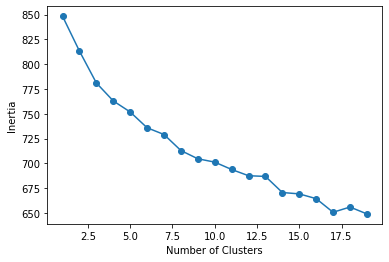

In [98]:
inertia = []
list_num_clusters = list(range(1,20))
for num_clusters in list_num_clusters:
    km = KMeans(n_clusters=num_clusters, max_iter=200, n_init=10)
    km.fit(doc_word_tfidf)
    inertia.append(km.inertia_)
    
plt.plot(list_num_clusters,inertia)
plt.scatter(list_num_clusters,inertia)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia');